In [22]:
from Load_image import *

# Example usage:
folder_path = "./datasets/recognition/train"
X_train,y_train,X_val,y_val = load_images_from_folder_sep(folder_path,test_size=0.2)
folder_path = "./datasets/recognition/test"
X_test,y_test = load_images_from_folder(folder_path)

#Numeric the labels set
list = []
num_class, list = count_class("./datasets/recognition/test")
label_to_index = {label: i for i, label in enumerate(list)}
y_train_numeric = np.array([label_to_index[label] for label in y_train])
y_val_numeric = np.array([label_to_index[label] for label in y_val])
y_test_numeric = np.array([label_to_index[label] for label in y_test])

print(f"Number of loaded training images: {len(X_train)}") 
print(f"Number of loaded validation images: {len(X_val)}") 
print(f"Number of loaded test images: {len(X_test)}") 
print(f"- Classes sets include : {list}")
#print(X_train[0][0][0][0])#pixel value at specific point
#x,y,z=np.array(X_train[0]).shape #size of specific picture
#print(x,y,z)

# Now 'images' contains a list of PIL Image objects from all the im

Training:  000_hatsune_miku 44
Validating:  000_hatsune_miku 11
Training:  001_kinomoto_sakura 105
Validating:  001_kinomoto_sakura 27
Training:  002_suzumiya_haruhi 65
Validating:  002_suzumiya_haruhi 17
Training:  003_fate_testarossa 51
Validating:  003_fate_testarossa 13
Training:  004_takamachi_nanoha 69
Validating:  004_takamachi_nanoha 18
Training:  005_lelouch_lamperouge 48
Validating:  005_lelouch_lamperouge 13
Training:  006_akiyama_mio 47
Validating:  006_akiyama_mio 12
Training:  008_shana 60
Validating:  008_shana 16
Training:  009_hakurei_reimu 65
Validating:  009_hakurei_reimu 17
Training:  010_izumi_konata 72
Validating:  010_izumi_konata 19
Testing:  000_hatsune_miku 12
Testing:  001_kinomoto_sakura 28
Testing:  002_suzumiya_haruhi 20
Testing:  003_fate_testarossa 16
Testing:  004_takamachi_nanoha 21
Testing:  005_lelouch_lamperouge 14
Testing:  006_akiyama_mio 15
Testing:  008_shana 18
Testing:  009_hakurei_reimu 19
Testing:  010_izumi_konata 22
Number of loaded traini

In [23]:
from hog_function import *
import matplotlib.pyplot as plt

X_train_hog=[]
X_val_hog=[]
X_test_hog=[]
img = np.zeros(len(X_train))

for i in range (len(X_train)):
    img = my_hog_function(X_train[i])
    x,y,z=np.array(X_train[i]).shape
    img=img.astype('uint8') # visualize the mean image
    X_train_hog.append(img)
for i in range (len(X_val)):
    img = my_hog_function(X_val[i])
    x,y,z=np.array(X_val[i]).shape
    img=img.astype('uint8') # visualize the mean image
    X_val_hog.append(img)
for i in range (len(X_test)):
    img = my_hog_function(X_test[i])
    x,y,z=np.array(X_test[i]).shape
    img=img.astype('uint8') # visualize the mean image
    X_test_hog.append(img)
    
print(f"length of histogram: {len(X_train_hog)}")
print(f"length of histogram: {len(X_val_hog)}")
print(f"length of histogram: {len(X_test_hog)}")

X_train_hog = np.array(X_train_hog)
X_val_hog = np.array(X_val_hog)
X_test_hog = np.array(X_test_hog)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test =np.array(y_test)

print("Shape of training set: ",X_train_hog.shape)
print("Shape of validating set: ",X_val_hog.shape)
print("Shape of testing set: ",X_test_hog.shape)

#print(y_train_numeric.shape)
#print(y_val_numeric.shape)
#print(y_test_numeric.shape)



length of histogram: 626
length of histogram: 163
length of histogram: 185
Shape of training set:  (626, 576)
Shape of validating set:  (163, 576)
Shape of testing set:  (185, 576)


In [24]:
X_train_hog = np.hstack([X_train_hog, np.ones((X_train_hog.shape[0], 1))])
X_val_hog = np.hstack([X_val_hog, np.ones((X_val_hog.shape[0], 1))])
X_test_hog = np.hstack([X_test_hog, np.ones((X_test_hog.shape[0], 1))])
#X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
print (X_train_hog.shape, X_val_hog.shape, X_test_hog.shape)#, X_dev.shape

(626, 577) (163, 577) (185, 577)


In [25]:
# In the file linear_classifier.py, implement SGD in the function
# LinearClassifier.train() and then run it with the code below.
from linear_classifier_t import *
import time

svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train_hog, y_train, learning_rate=5e-7, reg=5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print ('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 6.738518
iteration 100 / 1500: loss 5.928866
iteration 200 / 1500: loss 5.403082
iteration 300 / 1500: loss 5.434049
iteration 400 / 1500: loss 5.260803
iteration 500 / 1500: loss 5.775387
iteration 600 / 1500: loss 5.773637
iteration 700 / 1500: loss 5.515852
iteration 800 / 1500: loss 5.557174
iteration 900 / 1500: loss 5.675171
iteration 1000 / 1500: loss 5.751447
iteration 1100 / 1500: loss 5.646177
iteration 1200 / 1500: loss 5.874812
iteration 1300 / 1500: loss 5.743237
iteration 1400 / 1500: loss 5.734016
That took 1.810974s


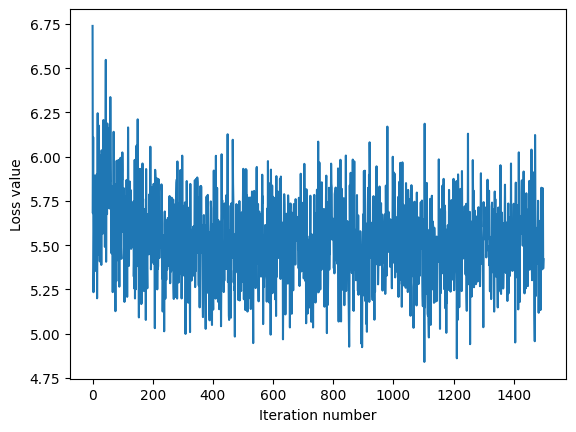

In [26]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [27]:
# Write the LinearSVM.predict function and evaluate the performance on both the
# training and validation set
y_train_pred = svm.predict(X_train_hog)
print ('training accuracy: %f' % (np.mean(y_train_numeric == y_train_pred), ))
y_val_pred = svm.predict(X_val_hog)
print ('validation accuracy: %f' % (np.mean(y_val_numeric == y_val_pred), ))

training accuracy: 0.338658
validation accuracy: 0.233129


In [28]:
from linear_classifier_t import *
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.4 on the validation set.
learning_rates = [1e-7, 2e-7, 3e-7, 8e-7]
regularization_strengths = [1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4, 8e4, 1e5]

# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.
  
for lr in learning_rates:
    for r in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_hog, y_train, learning_rate=lr, reg=r,
                      num_iters=2500, verbose=False)
        y_train_pred = svm.predict(X_train_hog)
        #print(y_train_pred.shape)
        y_val_pred = svm.predict(X_val_hog)
        acc_train = np.mean(y_train_numeric == y_train_pred)
        #print(acc_train)
        acc_val = np.mean(y_val_numeric == y_val_pred)
        results[(lr, r)] = (acc_train, acc_val)
        print (lr, r, acc_train, acc_val)
        if acc_val > best_val:
            best_val = acc_val
            best_svm = svm
# print 'validation accuracy: %f' % (np.mean(y_val == y_val_pred), )

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print ('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print ('best validation accuracy achieved during cross-validation: %f' % best_val)

1e-07 10000.0 0.5543130990415336 0.3558282208588957
1e-07 20000.0 0.4984025559105431 0.3558282208588957
1e-07 30000.0 0.46006389776357826 0.31901840490797545
1e-07 40000.0 0.43929712460063897 0.3006134969325153
1e-07 50000.0 0.3913738019169329 0.3006134969325153
1e-07 60000.0 0.31629392971246006 0.2331288343558282
1e-07 70000.0 0.34185303514376997 0.2392638036809816
1e-07 80000.0 0.30990415335463256 0.24539877300613497
1e-07 100000.0 0.25559105431309903 0.1901840490797546
2e-07 10000.0 0.5543130990415336 0.37423312883435583
2e-07 20000.0 0.5063897763578274 0.3312883435582822
2e-07 30000.0 0.44568690095846647 0.34355828220858897
2e-07 40000.0 0.3993610223642173 0.3067484662576687
2e-07 50000.0 0.38977635782747605 0.3374233128834356
2e-07 60000.0 0.35942492012779553 0.24539877300613497
2e-07 70000.0 0.3035143769968051 0.22699386503067484
2e-07 80000.0 0.3210862619808307 0.25153374233128833
2e-07 100000.0 0.23162939297124602 0.1901840490797546
3e-07 10000.0 0.5463258785942492 0.3558282208

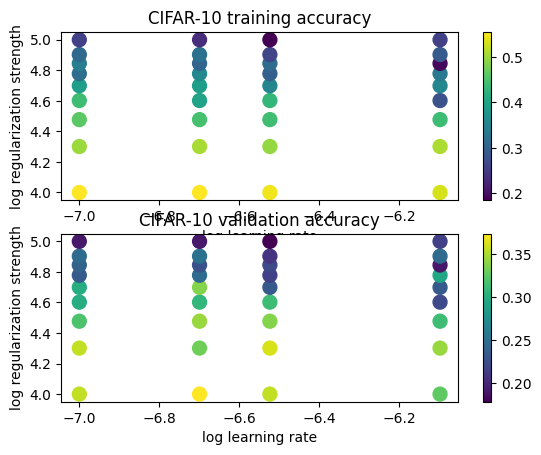

In [29]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [30]:
# Evaluate the best svm on test set
print(X_test_hog.shape)
y_test_pred = best_svm.predict(X_test_hog)
test_accuracy = np.mean(y_test_numeric == y_test_pred)
print ('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

(185, 577)
linear SVM on raw pixels final test set accuracy: 0.302703


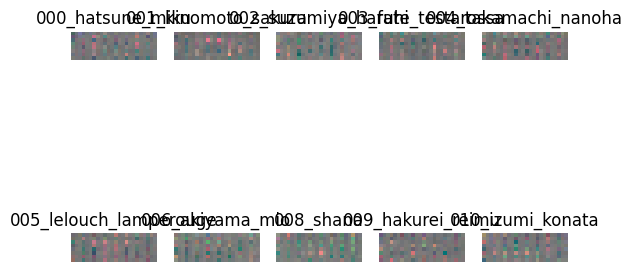

In [31]:
# Visualize the learned weights for each class.
# Depending on your choice of learning rate and regularization strength, these may
# or may not be nice to look at.
w = best_svm.W[:-1,:] # strip out the bias
w = w.reshape(8, 24, 3, 10)
w_min, w_max = np.min(w), np.max(w)
list
for i in range(10):
  plt.subplot(2, 5, i + 1)
    
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(list[i])

In [32]:
##############################################################################################################

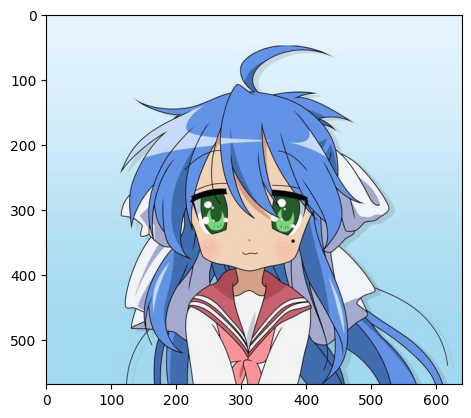

In [33]:
img = cv2.imread("./datasets/sample2.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [34]:
from hog_function import *
import matplotlib.pyplot as plt

print(img.shape)
img_1 = my_hog_function(img)
img_1=img_1.astype('uint8') # visualize the mean image
img_1 = np.array(img_1)
print(img_1.shape[0])
img_1 = np.append(img_1, 1)
print(img_1.shape[0])
print(len(img_1.shape))
y_test_pred = best_svm.predict(img_1)
test_accuracy = np.mean(y_test_numeric == y_test_pred)
print ('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)
print("it is : ",list[y_test_pred])

(569, 640, 3)
576
577
1
linear SVM on raw pixels final test set accuracy: 0.097297
it is :  008_shana
